In [ ]:
!pip install fastai

In [3]:
from fastai.vision.all import *

In [4]:
path = untar_data(URLs.MNIST_SAMPLE)

In [5]:
mnist = DataBlock((ImageBlock(cls=PILImageBW), CategoryBlock),
                  get_items= get_image_files,
                  splitter=GrandparentSplitter(),
                  get_y=parent_label)

In [6]:
dls = mnist.dataloaders(path)

In [7]:
xb, yb = first(dls.valid)

In [8]:
xb.shape, yb.shape

(torch.Size([64, 1, 28, 28]), torch.Size([64]))

In [9]:
xb, yb = to_cpu(xb), to_cpu(yb)

In [10]:
broken_cnn = sequential(
    nn.Conv2d(1,30,kernel_size=3,padding=1),
    nn.ReLU(),
    nn.Conv2d(30,1,kernel_size=3, padding=1)
)

In [11]:
broken_cnn


Sequential(
  (0): Conv2d(1, 30, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU()
  (2): Conv2d(30, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
)

In [12]:
broken_cnn(xb).shape

torch.Size([64, 1, 28, 28])

In [13]:
def conv(ni, nf, ks=3, act=True):
  res = nn.Conv2d(ni, nf, stride=2, kernel_size=ks, padding=ks//2)
  if act: res = nn.Sequential(res, nn.ReLU())
  return res

In [14]:
# Let's define a simple CNN

In [15]:
simple_cnn = sequential(
    conv(1,4),
    conv(4,8),
    conv(8,16),
    conv(16, 32),
    conv(32,2,act=True),
    Flatten()
)

In [16]:
simple_cnn(xb).shape

torch.Size([64, 2])

In [17]:
learn = Learner(dls,simple_cnn,loss_func=F.cross_entropy, metrics=accuracy)

In [18]:
learn.summary()

Sequential (Input shape: 64 x 1 x 28 x 28)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 4 x 14 x 14    
Conv2d                                    40         True      
ReLU                                                           
____________________________________________________________________________
                     64 x 8 x 7 x 7      
Conv2d                                    296        True      
ReLU                                                           
____________________________________________________________________________
                     64 x 16 x 4 x 4     
Conv2d                                    1168       True      
ReLU                                                           
____________________________________________________________________________
                     64 x 32 x 2 x 2     
Conv2d                                    4640       True      
ReLU                                          

In [19]:
#(path/"train/3/").ls()


In [20]:
#x = Image.open(r'/root/.fastai/data/mnist_sample/train/3/30754.png')

In [21]:
#x.shape

In [22]:
!ls -l /root/.fastai/data/mnist_sample/train/3/ | wc -l


6132


In [23]:
learn.fit_one_cycle(2,0.01)

epoch,train_loss,valid_loss,accuracy,time
0,0.693147,0.693148,0.495584,00:13
1,0.693148,0.693148,0.495584,00:12


In [24]:
# Let's check the model details

In [25]:
mm = learn.model[0]

In [26]:
mm

Sequential(
  (0): Conv2d(1, 4, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (1): ReLU()
)

In [27]:
mm[0].weight.shape

torch.Size([4, 1, 3, 3])

In [28]:
#

In [29]:

!wget https://tse3-mm.cn.bing.net/th/id/OIP-C.olq0Zxl2Q0r6I4gMoK-1XQHaEo?pid=ImgDet&rs=1

--2023-09-22 12:36:07--  https://tse3-mm.cn.bing.net/th/id/OIP-C.olq0Zxl2Q0r6I4gMoK-1XQHaEo?pid=ImgDet
Resolving tse3-mm.cn.bing.net (tse3-mm.cn.bing.net)... 204.79.197.200, 13.107.21.200
Connecting to tse3-mm.cn.bing.net (tse3-mm.cn.bing.net)|204.79.197.200|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18930 (18K) [image/jpeg]
Saving to: ‘OIP-C.olq0Zxl2Q0r6I4gMoK-1XQHaEo?pid=ImgDet’

OIP-C.olq0Zxl2Q0r6I 100%[===================>]  18.49K  --.-KB/s    in 0s      

2023-09-22 12:36:07 (275 MB/s) - ‘OIP-C.olq0Zxl2Q0r6I4gMoK-1XQHaEo?pid=ImgDet’ saved [18930/18930]



In [30]:
!ls -l

total 24
-rw-r--r-- 1 root root 18930 Sep 22 12:36 'OIP-C.olq0Zxl2Q0r6I4gMoK-1XQHaEo?pid=ImgDet'
drwxr-xr-x 1 root root  4096 Sep 20 13:25  sample_data


In [31]:
!mv "OIP-C.olq0Zxl2Q0r6I4gMoK-1XQHaEo?pid=ImgDet" "grizzly.jpg"

In [32]:
!pwd


/content


In [33]:
!ls -l /content/*.jpg

-rw-r--r-- 1 root root 18930 Sep 22 12:36 /content/grizzly.jpg


In [34]:
!ls -l /content/grizzly.jpg

-rw-r--r-- 1 root root 18930 Sep 22 12:36 /content/grizzly.jpg


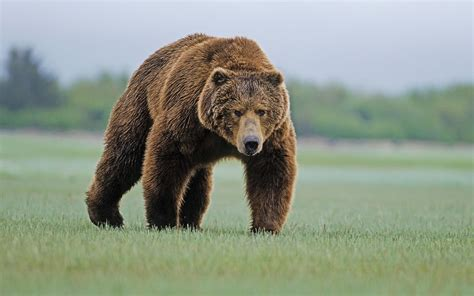

In [35]:
Image.open('/content/grizzly.jpg')

In [36]:
gimg = Image.open('/content/grizzly.jpg')

In [37]:
im = image2tensor(gimg)

In [38]:
im.shape

torch.Size([3, 296, 474])

<Axes: >

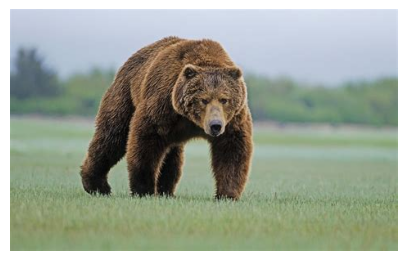

In [39]:
show_image(im)

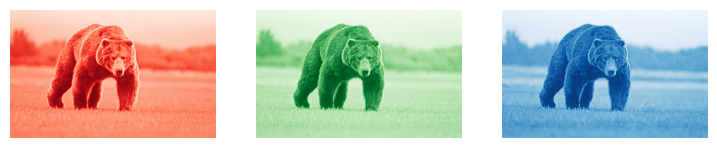

In [40]:
_,axs = subplots(1,3)
for bear, ax,color in zip(im,axs,('Reds','Greens','Blues')):
  show_image(255-bear, ax=ax, cmap=color)

In [41]:
#

In [42]:
path = untar_data(URLs.MNIST)

In [43]:
path.ls()

(#2) [Path('/root/.fastai/data/mnist_png/training'),Path('/root/.fastai/data/mnist_png/testing')]

In [44]:
def get_dls(bs=64):
  return DataBlock(
      blocks = (ImageBlock(cls=PILImageBW),CategoryBlock),
      get_items=get_image_files,
      splitter = GrandparentSplitter('training', 'testing'),
      get_y = parent_label,
      batch_tfms = Normalize()
  ).dataloaders(path, bs=bs)

In [45]:
dls = get_dls()

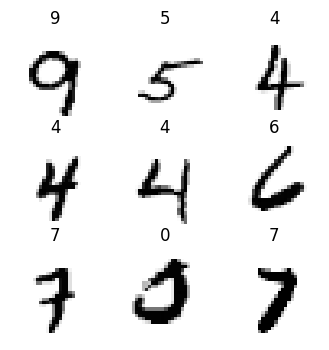

In [46]:
dls.show_batch(max_n=9, figsize=(4,4))

In [47]:
def conv(ni, nf, ks=3, act=True):
  res = nn.Conv2d(ni, nf, stride=2, kernel_size=ks, padding=ks//2)
  if act: res = nn.Sequential(res, nn.ReLU())
  return res

In [49]:
def simple_cnn():
  return sequential(
      conv(1,8,  ks=5), # 14x14
      conv(8,16),     # 7x7
      conv(16,32),     # 4x4
      conv(32,64),     # 2x2
      conv(64,10,act=False), #1x1
      Flatten(),
  )

In [50]:
from fastai.callback.hook import *


In [54]:
def fit(epochs=1):
  learn = Learner(dls, simple_cnn(), loss_func=F.cross_entropy,
                  metrics = accuracy, cbs = ActivationStats(with_hist=True))
  learn.fit(epochs, 0.06)
  return learn

In [55]:
learn = fit()

/usr/local/lib/python3.10/dist-packages/fastai/callback/core.py:69: UserWarning: You are shadowing an attribute (modules) that exists in the learner. Use `self.learn.modules` to avoid this
  warn(f"You are shadowing an attribute ({name}) that exists in the learner. Use `self.learn.{name}` to avoid this")


epoch,train_loss,valid_loss,accuracy,time
0,2.306853,2.303522,0.113500,01:08


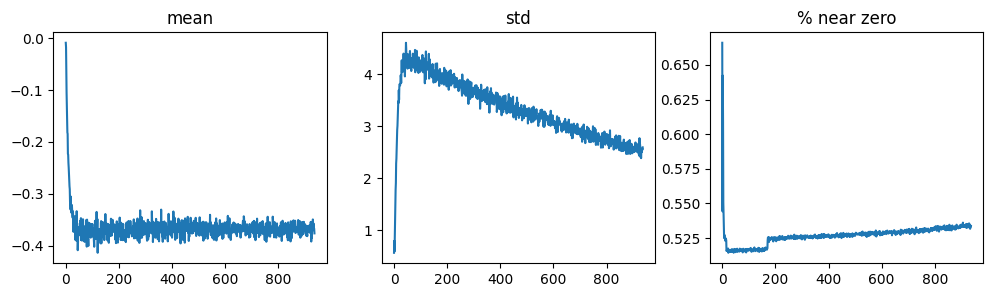

In [56]:
learn.activation_stats.plot_layer_stats(0)

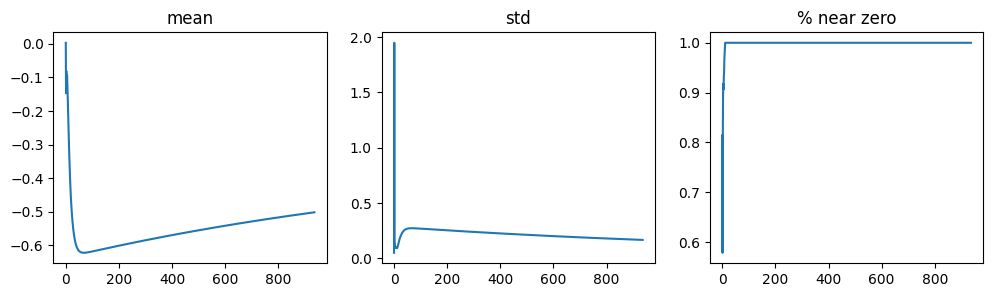

In [57]:
learn.activation_stats.plot_layer_stats(-2)